In [ ]:
x =3

In [ ]:
print(type(x))

<class 'int'>


In [ ]:
print(x)

3


In [ ]:
print(x+1)

4


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install keras

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
batch_size=32
num_classes = 10
epochs = 50
num_predictions = 20

In [ ]:
## The data, split between train and test sets:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print("x_train.shape:",x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

x_train.shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


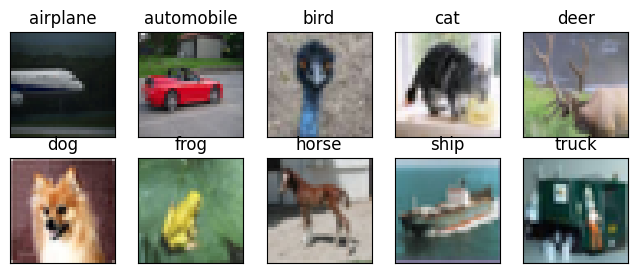

In [ ]:
## Plotting some random 10 images

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
  ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
  idx = np.where(y_train[:]==i)[0]
  features_idx = x_train[idx,::]
  img_num = np.random.randint(features_idx.shape[0])
  im = (features_idx[img_num,::])
  ax.set_title(class_names[i])
  plt.imshow(im)
plt.show()

In [ ]:
## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1: ]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [ ]:
#initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay = 1e-6)

## Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data = (x_test,y_test),
          shuffle=True)

Epoch 1/100
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0932 - accuracy: 0.2214 - val_loss: 1.8445 - val_accuracy: 0.3408
Epoch 2/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7569 - accuracy: 0.3589 - val_loss: 1.5658 - val_accuracy: 0.4263
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5574 - accuracy: 0.4262 - val_loss: 1.3959 - val_accuracy: 0.4887
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4373 - accuracy: 0.4795 - val_loss: 1.2939 - val_accuracy: 0.5387
Epoch 5/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3556 - accuracy: 0.5124 - val_loss: 1.2378 - val_accuracy: 0.5642
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2898 - accuracy: 0.5369 - val_loss: 1.1957 - val_accuracy: 0.5753
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2345 - accuracy: 0.5596 - val_loss: 1.1453 - val

In [ ]:
import pandas as pd
res = pd.DataFrame({
    'Experiment':['Dropouts After Conv and FC layers'],
    'Train_Acc' : 83.84,
    'Val_Acc' : 79.63
})
res

,Experiment,Train_Acc,Val_Acc
0,Dropouts After Conv and FC layers,83.84,79.63


In [ ]:
## Experiment - II: Remove the dropouts after the convolutional layers (but retain them in the FC layer). Also, use batch normalization after every convolutional layer.
# Defining the parameters
batch_size = 32
num_classes = 10
epochs = 50

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
## summary of the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                     

In [ ]:
## compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics='accuracy'
              )
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


## Normalizing the input image
x_train /=255
x_test /=255

In [ ]:
## training the model
model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs = epochs,
          validation_data = (x_test,y_test),
          shuffle = True
          )

Epoch 1/50
1563/1563 [==============================] - 19s 7ms/step - loss: 1.5575 - accuracy: 0.4507 - val_loss: 1.2432 - val_accuracy: 0.5556
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1502 - accuracy: 0.5926 - val_loss: 1.0237 - val_accuracy: 0.6390
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9733 - accuracy: 0.6554 - val_loss: 0.9388 - val_accuracy: 0.6668
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8621 - accuracy: 0.6964 - val_loss: 0.8260 - val_accuracy: 0.7109
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7783 - accuracy: 0.7265 - val_loss: 0.7875 - val_accuracy: 0.7283
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7166 - accuracy: 0.7462 - val_loss: 0.7564 - val_accuracy: 0.7337
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6627 - accuracy: 0.7663 - val_loss: 0.7375 - val_accu

In [ ]:
res.loc[len(res)] = ['Removing Dropout after CNN layer and adding BN',97.93,78.68]
print(res)
print('Inference -  here there is an issue of overfitting since we have removed the dropout layer')

                                       Experiment  Train_Acc  Val_Acc
0               Dropouts After Conv and FC layers      83.84    79.63
1  Removing Dropout after CNN layer and adding BN      97.93    78.68
Inference -  here there is an issue of overfitting since we have removed the dropout layer


In [ ]:
## Experiment - III: Use batch normalization and dropouts after every convolutional layer. Also, retain the dropouts in the FC layer.
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape =x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
## model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_25 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_19 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_26 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_20 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                    

In [ ]:
## compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
## Normalizing the input image
x_train /=255
x_test /=255

In [ ]:
## training the model
model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs = epochs,
          validation_data = (x_test,y_test),
          shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 20s 11ms/step - loss: 1.7033 - accuracy: 0.4036 - val_loss: 1.3588 - val_accuracy: 0.5130
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3274 - accuracy: 0.5238 - val_loss: 1.1575 - val_accuracy: 0.5891
Epoch 3/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1662 - accuracy: 0.5829 - val_loss: 1.0586 - val_accuracy: 0.6296
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0577 - accuracy: 0.6252 - val_loss: 0.9281 - val_accuracy: 0.6749
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9759 - accuracy: 0.6533 - val_loss: 0.8511 - val_accuracy: 0.7017
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9106 - accuracy: 0.6770 - val_loss: 0.8224 - val_accuracy: 0.7095
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8653 - accuracy: 0.6941 - val_loss: 0.7818 - val_a

In [ ]:
res.loc[len(res)] = ['Use BN and Dropout after every CNN layer',89.16,81.92]
res

,Experiment,Train_Acc,Val_Acc
0,Dropouts After Conv and FC layers,83.84,79.63
1,Removing Dropout after CNN layer and adding BN,97.93,78.68
2,Use BN and Dropout after every CNN layer,89.16,81.92


In [ ]:
## Remove dropouts from conv layers, use L2 + dropouts in FC, use BN
from tensorflow.keras.regularizers import l2
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape =x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
## summary of the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_35 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_27 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_28 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_36 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_28 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                    

In [ ]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

In [ ]:
# Training the model
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 15s 8ms/step - loss: 7.7856 - accuracy: 0.4566 - val_loss: 5.6950 - val_accuracy: 0.5821
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 4.5080 - accuracy: 0.5982 - val_loss: 3.4862 - val_accuracy: 0.6313
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 2.8140 - accuracy: 0.6660 - val_loss: 2.2331 - val_accuracy: 0.6992
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8837 - accuracy: 0.7087 - val_loss: 1.6067 - val_accuracy: 0.7160
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3689 - accuracy: 0.7461 - val_loss: 1.2887 - val_accuracy: 0.7258
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0810 - accuracy: 0.7685 - val_loss: 1.0614 - val_accuracy: 0.7477
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9214 - accuracy: 0.7858 - val_loss: 0.9759 - val_ac

In [ ]:
res.loc[len(res)] = ['Remove dropouts from conv layers, use L2 + dropouts in FC',94.71,78.16]
res

,Experiment,Train_Acc,Val_Acc
0,Dropouts After Conv and FC layers,83.84,79.63
1,Removing Dropout after CNN layer and adding BN,97.93,78.68
2,Use BN and Dropout after every CNN layer,89.16,81.92
3,"Remove dropouts from conv layers, use L2 + dro...",94.71,78.16


In [ ]:
## Dropouts after conv layer, L2 in FC, use BN after convolutional layer
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape =x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

In [ ]:
# Training the model
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 14s 8ms/step - loss: 7.9154 - accuracy: 0.4110 - val_loss: 5.9273 - val_accuracy: 0.5026
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 4.6485 - accuracy: 0.5415 - val_loss: 3.6853 - val_accuracy: 0.5590
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.9568 - accuracy: 0.6052 - val_loss: 2.2980 - val_accuracy: 0.6679
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0208 - accuracy: 0.6569 - val_loss: 1.6452 - val_accuracy: 0.6987
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5116 - accuracy: 0.6907 - val_loss: 1.3197 - val_accuracy: 0.7129
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2288 - accuracy: 0.7153 - val_loss: 1.1379 - val_accuracy: 0.7276
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0731 - accuracy: 0.7318 - val_loss: 1.3848 - val_ac

In [ ]:
res.loc[len(res)] = ['Dropouts after conv layer, L2 in FC, use BN after convolutional layer',78.29,81.07]
res

,Experiment,Train_Acc,Val_Acc
0,Dropouts After Conv and FC layers,83.84,79.63
1,Removing Dropout after CNN layer and adding BN,97.93,78.68
2,Use BN and Dropout after every CNN layer,89.16,81.92
3,"Remove dropouts from conv layers, use L2 + dro...",94.71,78.16
4,"Dropouts after conv layer, L2 in FC, use BN af...",78.29,81.07


In [ ]:
## Experiment 6
#Experiment-VI: Add a new convolutional layer to the network
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
from tensorflow.keras.regularizers import l2
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape =x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                       

In [ ]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

In [ ]:
# Training the model
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 23s 10ms/step - loss: 5.5350 - accuracy: 0.3729 - val_loss: 4.1369 - val_accuracy: 0.4877
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 3.3590 - accuracy: 0.5192 - val_loss: 2.6280 - val_accuracy: 0.5789
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 2.2445 - accuracy: 0.5899 - val_loss: 1.8898 - val_accuracy: 0.6091
Epoch 4/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6274 - accuracy: 0.6381 - val_loss: 1.4211 - val_accuracy: 0.6528
Epoch 5/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2815 - accuracy: 0.6701 - val_loss: 1.1636 - val_accuracy: 0.6811
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0837 - accuracy: 0.6945 - val_loss: 1.1411 - val_accuracy: 0.6670
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9611 - accuracy: 0.7135 - val_loss: 0.9107 - val_

In [ ]:
import pandas as pd
res = pd.DataFrame(columns=['Experiment',	'Train_Acc'	,'Val_Acc'])
res.loc[0]=['Dropouts After Conv and FC layers',	83.84,	79.63]
res.loc[1] = ['Removing Dropout after CNN layer and adding BN'	,97.93,	78.68]
res.loc[2] = ['Use BN and Dropout after every CNN layer'	,89.16,	81.92]
res.loc[3] = ['Remove dropouts from conv layers, use L2 + dropouts in FC',94.71,	78.16]
res.loc[4]=['Dropouts after conv layer, L2 in FC, use BN after convolutional layer',78.29,81.07]
res.loc[len(res)] = ['Adding a new convolution layer',89.16,84.57]

In [ ]:
res

,Experiment,Train_Acc,Val_Acc
0,Dropouts After Conv and FC layers,83.84,79.63
1,Removing Dropout after CNN layer and adding BN,97.93,78.68
2,Use BN and Dropout after every CNN layer,89.16,81.92
3,"Remove dropouts from conv layers, use L2 + dro...",94.71,78.16
4,"Dropouts after conv layer, L2 in FC, use BN af...",78.29,81.07
5,Adding a new convolution layer,89.16,84.57


In [ ]:
## Experiment 7
#Experiment-VI: Add more feature maps to the convolutional layers to the network
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
model=Sequential()

model.add(Conv2D(64,(3,3),padding='same',input_shape =x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

In [ ]:
# Training the model
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 22s 12ms/step - loss: 8.5268 - accuracy: 0.4242 - val_loss: 6.2567 - val_accuracy: 0.5389
Epoch 2/50
1563/1563 [==============================] - 18s 12ms/step - loss: 4.9346 - accuracy: 0.5752 - val_loss: 3.8212 - val_accuracy: 0.6193
Epoch 3/50
1563/1563 [==============================] - 18s 11ms/step - loss: 3.0604 - accuracy: 0.6523 - val_loss: 2.3935 - val_accuracy: 0.7026
Epoch 4/50
1563/1563 [==============================] - 18s 12ms/step - loss: 2.0547 - accuracy: 0.6963 - val_loss: 1.7738 - val_accuracy: 0.6955
Epoch 5/50
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5139 - accuracy: 0.7264 - val_loss: 1.3586 - val_accuracy: 0.7332
Epoch 6/50
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2133 - accuracy: 0.7487 - val_loss: 1.1962 - val_accuracy: 0.7354
Epoch 7/50
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0461 - accuracy: 0.7654 - val_loss: 1.0599 -

In [ ]:
res.loc[len(res)] = ['Increasing the number of feature maps',92.38,83.64]
res

,Experiment,Train_Acc,Val_Acc
0,Dropouts After Conv and FC layers,83.84,79.63
1,Removing Dropout after CNN layer and adding BN,97.93,78.68
2,Use BN and Dropout after every CNN layer,89.16,81.92
3,"Remove dropouts from conv layers, use L2 + dro...",94.71,78.16
4,"Dropouts after conv layer, L2 in FC, use BN af...",78.29,81.07
5,Adding a new convolution layer,89.16,84.57
6,Increasing the number of feature maps,92.38,83.64


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


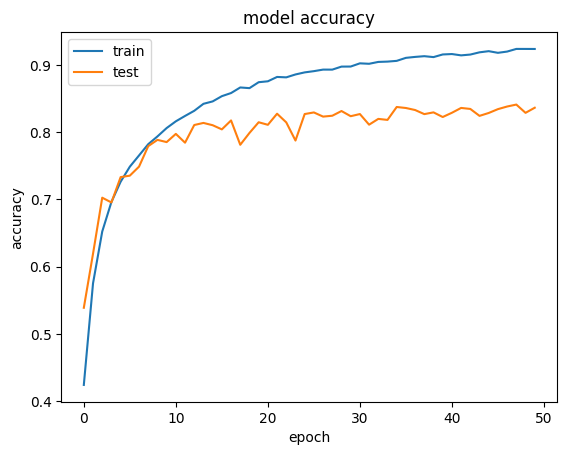

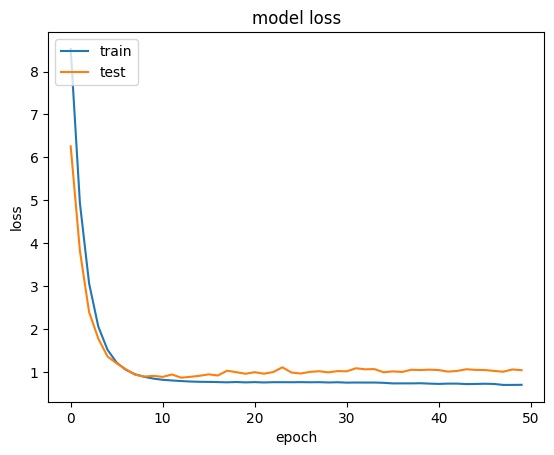

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()